# Tarea 1
## Francisco Javier Peralta Ramírez

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft2, ifft2, fftn, ifftn
from imageio import imread
from scipy.misc import imresize

### Ejercicio 1

In [2]:
A = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]]

def matrix_transpose(mtx):
    tr = [] # lista donde guararemos la transpuesta
    for j in range(len(mtx[0])):
        t_v = [] #lista temporal para almacenar cada renglon
        for i in range(len(mtx)):
            t_v.append(mtx[i][j]) #cambiamos los indices (i,j) a (j,i)
        tr.append(t_v) #agregamos la lista intercalada a nuestra transpuesta
    return tr

matrix_transpose(A)

[[1, 5, 9, 13], [2, 6, 10, 14], [3, 7, 11, 15], [4, 8, 12, 16]]

In [3]:
def matrix_transpose2(mtx):
    return [
             [   #internamente iteremos sobre i
                 mtx[i][j] for i in range(len(mtx))
             ]
             for j in range(len(mtx[0])) #iteramos sobre j externamente
           ]
matrix_transpose2(A)

[[1, 5, 9, 13], [2, 6, 10, 14], [3, 7, 11, 15], [4, 8, 12, 16]]

### Ejercicio 2

In [4]:
def gen_random_sample_dist(interval, seed=56125798, c=12345, m=32768, a=1103515245):
    x,y = interval # pasa intervalo a dos variables (mas facil de manejar)
    seed = [seed] #copiar a arreglo, evitando errores de scope
    def aleatorio():
        seed[0] = (a * seed[0] + c) % m
        return seed[0] % (y - x) + x
    return aleatorio #regresa funcion que regresa valores aleatorios en el rango

def gen_N_rand_samples(n, N, interval):
    al = gen_random_sample_dist(interval) #inicializa generador
    def gen_multi_random(N, interval):
        return [al() for j in range(N)] #genera renglon
    samples = [gen_multi_random(N, interval) for j in range(n)]
    return samples # regresa matriz (renglon es Xi)
    
interval = (0,10)
samples = gen_N_rand_samples(1, 1000, interval)

(array([  87.,   95.,   90.,  112.,  107.,  110.,  119.,   99.,   97.,   84.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

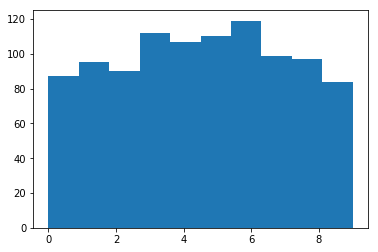

In [5]:
samplesT = matrix_transpose(samples)
sm = [sum(samplesT[i]) for i in range(len(samplesT))]
plt.hist(sm, bins=10)

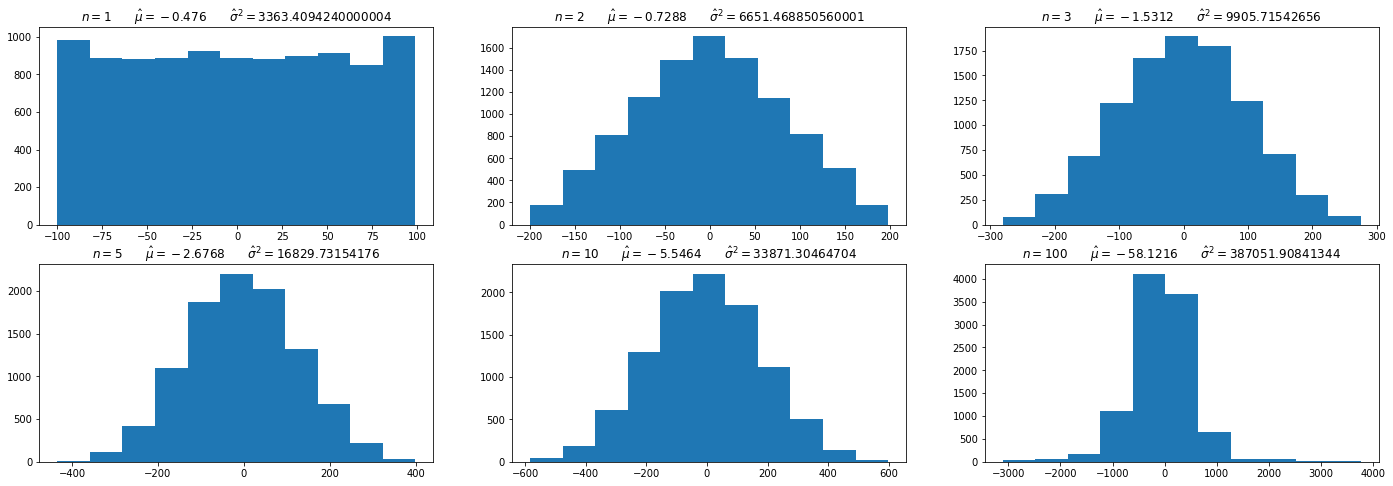

In [6]:
f, ax = plt.subplots(2, 3, figsize=(24, 8)) #genera espacio para multiples graficas
ns = [1, 2, 3, 5, 10, 100]
for i in range(2):
    for j in range(3):
        n = ns[i * 3 + j]
        interval = (-100, 100)
        samples = gen_N_rand_samples(n, 10000, interval)
        samplesT = matrix_transpose(samples)
        sm = [sum(samplesT[j]) for j in range(len(samplesT))]
        ax[i][j].hist(sm, bins = 11)
        ax[i][j].set_title(r'$n = {0} \qquad \hat\mu = {1} \qquad \hat\sigma^2 = {2}$'.format(n, np.mean(sm), np.var(sm)))
plt.show()

Sabemos que la media y la varianza de las distribuciones es


$\mu = \frac{n(b-a)}{2} \qquad \sigma^2 = \frac{n (b-a)^2}{12} \qquad \sigma = \sqrt{\frac{n}{12}} (b-a) $


Esto se puede demostrar facilmente.

Por las propiedades de las esperanzas sabemos que $E(X_1 + X_2 + ... + X_n) = EX_1 + EX_2 + \cdots + EX_n$, como todas vienen de la misma distribución tenemos que $E(X_1 + X_2 + ... + X_n) = n * EX$ donde $EX = \frac{b - a}{2}$ ya que viene de una distribución uniforme. Con las propiedades de las varianzas sabemos que $Var(X_1 + X_2 + \cdots + X_n) = Var(X_1) + Var(X_2) + \cdots + Var(X_n)$ cuando las variables son independiente (lo cual dado el algoritmo pseudo-aleatorio no es completamente cierto, pero asumimos que sí). Al ser de la misma distribución tenemos $Var(X_1 + X_2 + \cdots + X_n) = n Var(X)$, sabemos que la varianza de una distrinución uniforme es $\frac{1}{12}(b-a)^2$

Usando esta información podemos generar los datos de una normal ${N}(\mu, \sigma)$. Consideramos $Z \sim N(0,1)$ por lo que $X = \sigma_x Z + \mu_x \quad Z = (X - \mu_x)/\sigma_x$. Si ahora podemos generar X, para generar $Y \sim N(\mu_y,\sigma_y)$ basta con escribir Y en terminos de X.


\begin{align*}
Y &= \sigma_y Z + \mu_y \\
Y &= \sigma_y \frac{X - \mu_x}{\sigma_x} + \mu_y \\
\end{align*}

In [7]:
def gen_normal(mu, sigma, n , n_dists = 100):
    interval = (-100, 100) #nos da mu 0 (en casos ideales...)
    sigma_x = 200 * (n_dists/ 12) ** (1/2)
    X = matrix_transpose(gen_N_rand_samples(n_dists, n, interval))
    X = [sum(X[j]) for j in range(len(X))] #genera lista con distribucion X
    Y = [X[i] * (sigma/sigma_x) + mu #transforma cada dato a la nueva distribucion
             for i in range(len(X))
        ]
    return Y

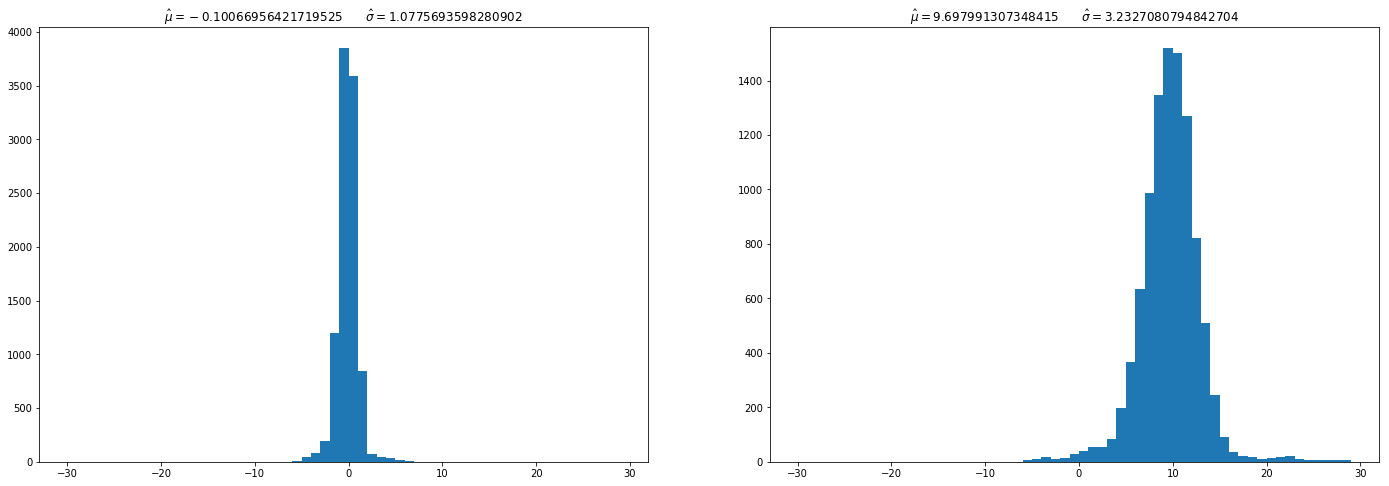

In [8]:
st = gen_normal(0,  1, 10000)
gs = gen_normal(10, 3, 10000)

f, ax = plt.subplots(1, 2, figsize=(24, 8))
ax[0].hist(st, range(-30, 30))
ax[0].set_title(r'$\hat\mu = {0} \qquad \hat\sigma = {1}$'.format( np.mean(st), np.std(st)))
ax[1].hist(gs, range(-30, 30))
ax[1].set_title(r'$\hat\mu = {0} \qquad \hat\sigma = {1}$'.format( np.mean(gs), np.std(gs)))

plt.show()

### Ejercicio 3

In [9]:
al = gen_random_sample_dist((0,100))
s = 100
A = np.array([ [al() for i in range(s)] for j in range(s)])
A = A.T + A #matrices simetricas tienen eig reales

In [10]:
%%time
def power_method(A, max_err = 1e-4, max_iter = 40000):
    eigvec = np.ones(s)
    err = 100
    while (err > max_err and max_iter):
        y = A @ eigvec
        eigvec = y / np.linalg.norm(y)
        vt = np.array(A @ eigvec)
        # calcular error
        eigval = eigvec @ vt
        err = np.linalg.norm(y - eigval*eigvec)
        max_iter -=1
#     print('Error {}'.format(err))
    return eigval, eigvec

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs


Podemos expresar A como $A=\sum_{i=1}^n \lambda_iv_iv^\intercal_i $, podemos encontrar el segundo eigen vector más grande calculando el eigen vector más grande para $B = A -\lambda_1v_1v^\intercal_1$. Para el tercero solo hay que repetir el proceso y restar $\lambda_2v_2v^\intercal_2$ a B y así seguirnos con cada k eigen vector

In [11]:
def biggest_k_eig(A, k, max_err = 1e-4, max_iter = 40000):
    eiv = []
    A2 = A
    for i in range(k):
        eig = power_method(A2)
        eiv.append(eig[0])
        A2 = np.array(A2 - eig[0] * np.matrix(eig[1]).T @ np.matrix(eig[1]))
    return eiv

biggest_k_eig(A, 3)        

[9913.9279329336096, 784.81962699143514, 746.04851971643507]

### Ejercicio 4

In [22]:
def punto_fijo_sqrt(b, x0, a, toler = 1e-4, max_iter = 10):
    x  = x0
    p  = lambda x : x * x - b #funciones para evaluar el modelo
    while(max_iter):
        max_iter -=1
        x = x - a * p(x) #actualizacion punto fijo
        err = p(x)
        print('Error {}'.format(err))
        if(abs(err) < toler) : break
    return x

punto_fijo_sqrt(2, 1, .5)

Error 0.25
Error -0.109375
Error 0.04400634765625
Error -0.018424837850034237
Error 0.007596386266167432
Error -0.0031524824377879845
Error 0.0013047704665218873
Error -0.0005406298168633139
Error 0.00022390592873700044
Error -9.275006341424863e-05


1.4141807698935047

In [20]:
def newton_sqrt(b, x0, toler = 1e-4, max_iter = 10):
    x  = x0
    f  = lambda x : x * x - b #funciones para evaluar el modelo
    fp = lambda x : 2 * x     #primera derivada del modelo
    while(max_iter):
        max_iter -=1
        x = x - f(x)/fp(x)   #actualizacion de newton
        err = f(x)
        print('Error {}'.format(err))
        if(abs(err) < toler) : break
    return x

newton_sqrt(2, 1)

Error 0.25
Error 0.006944444444444642
Error 6.007304882871267e-06


1.4142156862745099

En punto fijo, podemos considerar $p$ como nustra función de error, por lo que $\alpha$ sirve como nuestro tamaño de paso para intentar decrementar el error. Este parametro tiene su equivalente en el método de Newton en $\frac{1}{f'(x)}$. Dado que el método de Newton se basa en la primera derivada (usa la tangente) este puede diverger cuando en se cae en un punto donde la tangente no se comporta de forma esperada.

### Ejercicio 5

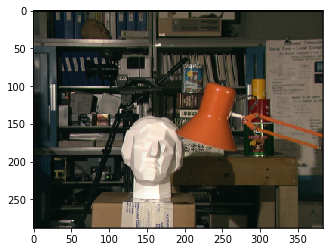

In [58]:
img = imread('image.png')
plt.imshow(img)

/home/jperalta/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


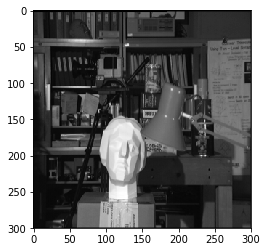

In [85]:
img_gray = np.sum(img,2)
img_gray = imresize(img_gray, (300, 300), interp='bicubic')
I = fft2(img_gray)
plt.imshow(img_gray, cmap='gray')

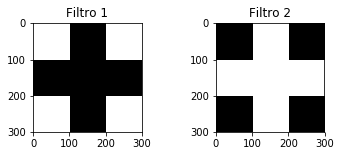

In [120]:
f1 = [[ not(100 < i < 200) and not((100 < j < 200)) for i in range(300)] for j in range(300)]
f2 = [[ (100 < i < 200) or ((100 < j < 200)) for i in range(300)] for j in range(300)]
f, ax = plt.subplots(1, 2, figsize=(6, 2))
ax[0].set_title("Filtro 1")
ax[0].imshow(f1, cmap='gray')
ax[1].set_title("Filtro 2")
ax[1].imshow(f2, cmap='gray')

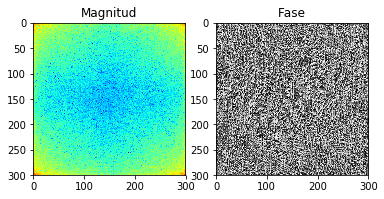

In [86]:
plt.subplot(121)
plt.imshow(np.log(np.abs(I)), cmap='jet')
plt.title('Magnitud')
plt.subplot(122)
plt.imshow(np.angle(I), cmap='gray')
plt.title('Fase')
plt.show()

Text(0.5,1,'Con filtro 2')

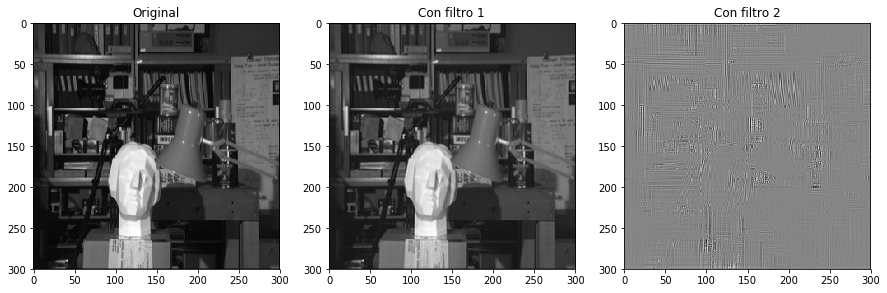

In [123]:
f, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(ifftn(f1 * I).real, cmap='gray')
ax[1].set_title('Con filtro 1')
ax[2].imshow(ifftn(f2 * I).real, cmap='gray')
ax[2].set_title('Con filtro 2')